<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Data5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [8]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi')
print(len(terinfeksi_data))
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi')
print(len(tidakTerinfeksi_data))
print(tidakTerinfeksi_data)

500
['C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121411a_ce

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DataBaru5050.csv", x, fmt='%s',delimiter=',' )

In [11]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DataBaru5050.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.018783  2.231958e-06  5.393779e-08  ...  3.336873e-10  1.835801e-14     1.0
1    0.023085  3.748378e-05  1.083478e-07  ...  1.259026e-10 -8.148153e-16     1.0
2    0.016134  5.471398e-06  4.302842e-07  ... -1.335775e-10 -1.873219e-13     1.0
3    0.013520  4.105438e-07  5.353142e-08  ...  2.694405e-10  6.253417e-14     1.0
4    0.032724  9.360229e-06  6.084419e-08  ... -4.993850e-10 -1.713192e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.031171  4.109943e-06  1.810409e-07  ...  5.707845e-11 -5.798803e-14     0.0
996  0.028813  5.315330e-05  5.834446e-07  ...  1.369571e-09 -4.101564e-14     0.0
997  0.031357  8.760306e-05  7.891352e-07  ... -4.522067e-10 -6.086681e-14     0.0
998  0.031835  2.547632e-04  1.446498e-06  ...  4.233811e-08 -1.566375e-12     0.0
999  0.029283  2.279823e-05  1.442529e-07  ...  1.038688e-10 -1.925017e-15     0.0

In [12]:
#split data (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.018783,2.231958e-06,5.393779e-08,3.262890e-07,-3.920058e-14,3.336873e-10,1.835801e-14
1,0.023085,3.748378e-05,1.083478e-07,2.212270e-08,-7.135643e-16,1.259026e-10,-8.148153e-16
2,0.016134,5.471398e-06,4.302842e-07,4.716702e-07,1.003089e-13,-1.335775e-10,-1.873219e-13
3,0.013520,4.105438e-07,5.353142e-08,4.211064e-07,-9.324107e-15,2.694405e-10,6.253417e-14
4,0.032724,9.360229e-06,6.084419e-08,1.992984e-07,1.371664e-14,-4.993850e-10,-1.713192e-14
...,...,...,...,...,...,...,...
995,0.031171,4.109943e-06,1.810409e-07,2.996576e-07,3.884299e-14,5.707845e-11,-5.798803e-14
996,0.028813,5.315330e-05,5.834446e-07,1.983919e-07,5.360589e-14,1.369571e-09,-4.101564e-14
997,0.031357,8.760306e-05,7.891352e-07,2.108081e-07,6.072975e-14,-4.522067e-10,-6.086681e-14
998,0.031835,2.547632e-04,1.446498e-06,2.750137e-06,-5.256767e-12,4.233811e-08,-1.566375e-12


1.0    456
0.0    444
Name: Actual, dtype: int64
0.0    56
1.0    44
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

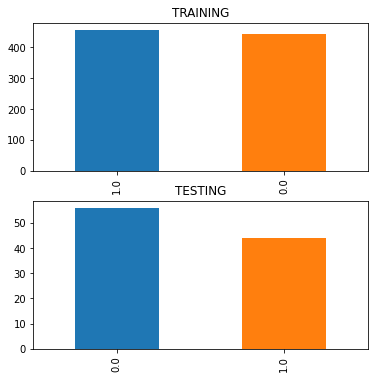

In [13]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [14]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.51036177, -0.30418673, -0.50110134, ...,  0.04578058,
        -0.26486051,  0.00742985],
       [ 0.10178942, -0.50282829, -0.59422445, ...,  0.04575101,
        -0.52915408, -0.02545305],
       [ 1.55909814, -0.04799362, -0.52707395, ...,  0.05203096,
        -0.10254772, -0.03943705],
       ...,
       [ 0.64720269,  2.76485461,  0.18558994, ...,  0.05229789,
        -0.04859243,  0.03951893],
       [ 1.32503043,  1.10066095, -0.01859989, ..., -0.00307495,
        -0.7997801 , -0.20906426],
       [-0.39966072, -0.45607514, -0.58667695, ...,  0.04925605,
        -0.28928604,  0.00715163]])

In [15]:
#u/ perulangan menampilkan semua nilai K

for x in range(2,900):   
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    print("k = " , x)
    print (cm)
    print("Akurasi :" , accuracy_score(y_test, y_pred))
    print("presisi :" , precision_score(y_test, y_pred,average=None))
    print("recall :" , recall_score(y_test, y_pred,average=None))
    print("F-Score :" , f1_score(y_test, y_pred,average=None))
    print("--------------------------------------------")

Output streaming akan dipotong hingga 5000 baris terakhir.
[[41 15]
 [ 6 38]]
Akurasi : 0.79
presisi : [0.87234043 0.71698113]
recall : [0.73214286 0.86363636]
F-Score : [0.7961165  0.78350515]
--------------------------------------------
k =  229
[[41 15]
 [ 6 38]]
Akurasi : 0.79
presisi : [0.87234043 0.71698113]
recall : [0.73214286 0.86363636]
F-Score : [0.7961165  0.78350515]
--------------------------------------------
k =  230
[[42 14]
 [ 6 38]]
Akurasi : 0.8
presisi : [0.875      0.73076923]
recall : [0.75       0.86363636]
F-Score : [0.80769231 0.79166667]
--------------------------------------------
k =  231
[[41 15]
 [ 6 38]]
Akurasi : 0.79
presisi : [0.87234043 0.71698113]
recall : [0.73214286 0.86363636]
F-Score : [0.7961165  0.78350515]
--------------------------------------------
k =  232
[[42 14]
 [ 6 38]]
Akurasi : 0.8
presisi : [0.875      0.73076923]
recall : [0.75       0.86363636]
F-Score : [0.80769231 0.79166667]
--------------------------------------------
k =  23

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  853
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  854
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  855
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  856
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  857
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  858
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  859
[[ 0 56]
 [ 0 44]]
Akuras

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  860
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  861
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  862
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  863
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  864
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  865
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  866
[[ 0 56]
 [ 0 44]]
Akuras

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  868
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  869
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  870
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  871
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  872
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  873
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  874
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  875
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  876
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  877
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  878
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  879
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  880
[[ 0 56]
 [ 0 44]]
Akuras

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  881
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  882
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  883
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  884
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  885
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  886
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  887
[[ 0 56]
 [ 0 44]]
Akuras

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  888
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  889
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  890
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  891
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  892
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  893
[[ 0 56]
 [ 0 44]]
Akurasi : 0.44
presisi : [0.   0.44]
recall : [0. 1.]
F-Score : [0.         0.61111111]
--------------------------------------------
k =  894
[[ 0 56]
 [ 0 44]]
Akuras

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [16]:
#u/ perulangan lgsng mencari nilai K yang mempunyai akurasi tertinggi

akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 40
[[48  8]
 [ 5 39]]
Akurasi : 0.87
presisi : 0.8297872340425532
recall : 0.8863636363636364
F-Score : 0.8571428571428571
--------------------------------------------
